# Example

In [1]:
# import libraries
import gym
import gym_trading
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# creating environment
env = gym.make('trading-v0', n_samples=10000, fee=0.25)

print('Number of actions:', env.action_space.n)

Number of actions: 2


In [3]:
# resetting environment
observation = env.reset() # the observation is the price of the bitcoin at this timestamp.

In [4]:
rewards = []
# simulating a trading session
done = False
counter = 0
while not done:
    
    # random action [BUY, SELL]
    action = np.random.randint(500) # actions admitted are 0 and 1 only.
    observation, reward, done, _ = env.step(action)
    rewards.append(reward)
    if counter % 1000 == 0:
        print(f'Iteration: {counter} - Reward (profit): {reward} - Done: {done} - Price: {observation}')

    counter += 1

print(f'Total profit: {round(env.get_profit(), 2)} %')

Iteration: 0 - Reward (profit): 0 - Done: False - Price: 8664.7001953125
Iteration: 1000 - Reward (profit): -35.81355468749962 - Done: False - Price: 9327.0
Iteration: 2000 - Reward (profit): 108.0748944091797 - Done: False - Price: 10111.099609375
Iteration: 3000 - Reward (profit): 105.05331624348962 - Done: False - Price: 9645.2001953125
Iteration: 4000 - Reward (profit): -71.66770324707034 - Done: False - Price: 8611.7998046875
Iteration: 5000 - Reward (profit): -53.05223632812502 - Done: False - Price: 7856.5
Iteration: 6000 - Reward (profit): 130.3381879679362 - Done: False - Price: 6354.10009765625
Iteration: 7000 - Reward (profit): 58.1253783798218 - Done: False - Price: 6254.39990234375
Iteration: 8000 - Reward (profit): 13.30693043428311 - Done: False - Price: 6902.10009765625
Iteration: 9000 - Reward (profit): 23.054246063232426 - Done: False - Price: 6974.9501953125
Total profit: 2.84 %


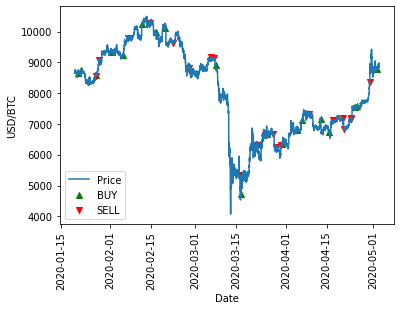

In [5]:
env.render()

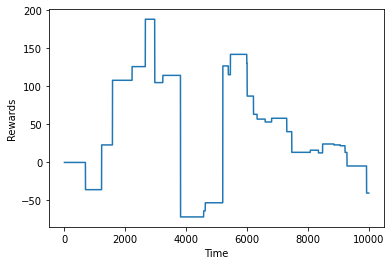

In [6]:
plt.plot(rewards)
plt.xlabel('Time')
plt.ylabel('Rewards')
plt.show()